In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [294]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)

In [295]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [296]:
df.columns =['Production']

<Axes: xlabel='DATE'>

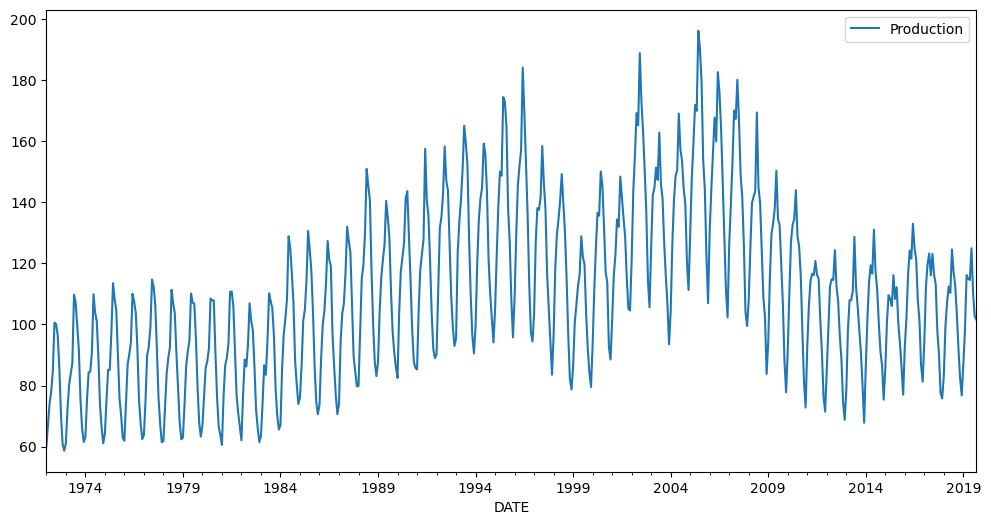

In [297]:
df.plot(figsize=(12,6))

In [298]:
len(df)

573

In [299]:
573 - 24

549

In [300]:
train = df.iloc[:549]

In [301]:
test = df.iloc[549:]

In [304]:
from sklearn.preprocessing import MinMaxScaler

In [305]:
scaler = MinMaxScaler()

In [306]:
scaled_train=scaler.fit_transform(train)

In [307]:
scaled_test = scaler.transform(test)

In [308]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [309]:
length = 18

In [310]:
train_generator = TimeseriesGenerator(scaled_train,scaled_train,
                                    length=length,batch_size=1)

In [311]:
test_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [312]:
x,y = train_generator[0]

In [313]:
n_feature = 1

In [314]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM

In [375]:
model = Sequential()

In [376]:
model.add(LSTM(100,activation='relu',input_shape=(length,n_feature),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(25,activation='relu'))


model.add(Dense(1))


C:\Users\sudhi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [377]:
model.compile(optimizer='adam',loss='mse')

In [378]:
from tensorflow.keras.callbacks import EarlyStopping

In [379]:
early = EarlyStopping(monitor='val_loss',patience=2)

In [380]:
model.fit(train_generator,epochs=20,validation_data=test_generator,callbacks=[early])

Epoch 1/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0436 - val_loss: 0.0095
Epoch 2/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0244 - val_loss: 0.0019
Epoch 3/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0112 - val_loss: 0.0018
Epoch 4/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0091 - val_loss: 9.9374e-04
Epoch 5/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 6/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0076 - val_loss: 0.0069


In [381]:
losses = pd.DataFrame(model.history.history)

<Axes: >

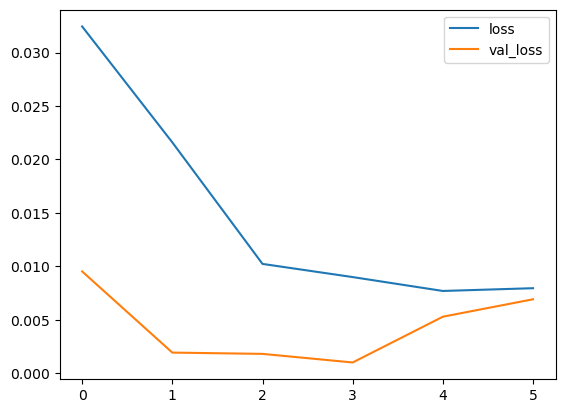

In [382]:
losses.plot()

In [383]:
test_predictions =[]

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_feature)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [384]:
test_predictions

[array([0.2932229], dtype=float32),
 array([0.20768125], dtype=float32),
 array([0.15353602], dtype=float32),
 array([0.16809508], dtype=float32),
 array([0.33019274], dtype=float32),
 array([0.44032702], dtype=float32),
 array([0.5119344], dtype=float32),
 array([0.5487386], dtype=float32),
 array([0.5306124], dtype=float32),
 array([0.4520819], dtype=float32),
 array([0.35912573], dtype=float32),
 array([0.28482765], dtype=float32),
 array([0.22791073], dtype=float32),
 array([0.17901684], dtype=float32),
 array([0.15339373], dtype=float32),
 array([0.27619228], dtype=float32),
 array([0.37436873], dtype=float32),
 array([0.4808407], dtype=float32),
 array([0.5265945], dtype=float32),
 array([0.5695185], dtype=float32),
 array([0.56765795], dtype=float32),
 array([0.51497585], dtype=float32),
 array([0.40731454], dtype=float32),
 array([0.29107076], dtype=float32)]

In [385]:
test_predictions = scaler.inverse_transform(test_predictions)

In [386]:
test['Preds'] = test_predictions

C:\Users\sudhi\AppData\Local\Temp\ipykernel_3700\35718987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Preds'] = test_predictions


<Axes: xlabel='DATE'>

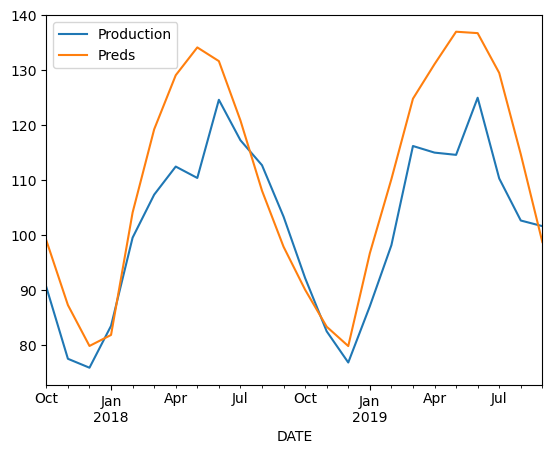

In [387]:
test.plot()

In [388]:
from sklearn.metrics import mean_absolute_percentage_error

In [389]:
test.head()

,Production,Preds
DATE,,
2017-10-01,90.4732,98.982025
2017-11-01,77.4378,87.218859
2017-12-01,75.8118,79.773137
2018-01-01,83.4343,81.775210
2018-02-01,99.4899,104.065892


In [390]:
print("MAPE ::",mean_absolute_percentage_error(test['Production'],test['Preds']))

MAPE :: 0.08850609332996413


In [391]:
scaled_df = scaler.fit_transform(df)

In [392]:
generator = TimeseriesGenerator(scaled_df,scaled_df,length=length,batch_size=1)

In [393]:
model = Sequential()

In [394]:
model.add(LSTM(100,activation='relu',input_shape=(length,n_feature),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(25,activation='relu'))


model.add(Dense(1))

C:\Users\sudhi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [395]:
model.compile(optimizer='adam',loss='mse')

In [397]:
model.fit(generator,epochs=5)

Epoch 1/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0077
Epoch 2/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0065
Epoch 3/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0065
Epoch 4/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0072
Epoch 5/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0058


In [398]:
forecast =[]

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_feature)

for i in range(18):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [399]:
forecast = scaler.inverse_transform(forecast)

In [400]:
df.shape

(573, 1)

In [401]:
forecast_index = pd.date_range('2019-10-01',periods=18 , freq='MS' )

In [402]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [403]:
forecast_df = pd.DataFrame(data = forecast,index=forecast_index,columns=['Forecast'])

In [404]:
forecast_df

,Forecast
2019-10-01,101.953351
2019-11-01,95.584397
2019-12-01,89.152322
2020-01-01,96.377819
2020-02-01,107.342684
2020-03-01,116.516059
2020-04-01,121.616852
2020-05-01,127.286746
2020-06-01,127.286537
2020-07-01,120.048810


<Axes: xlabel='DATE'>

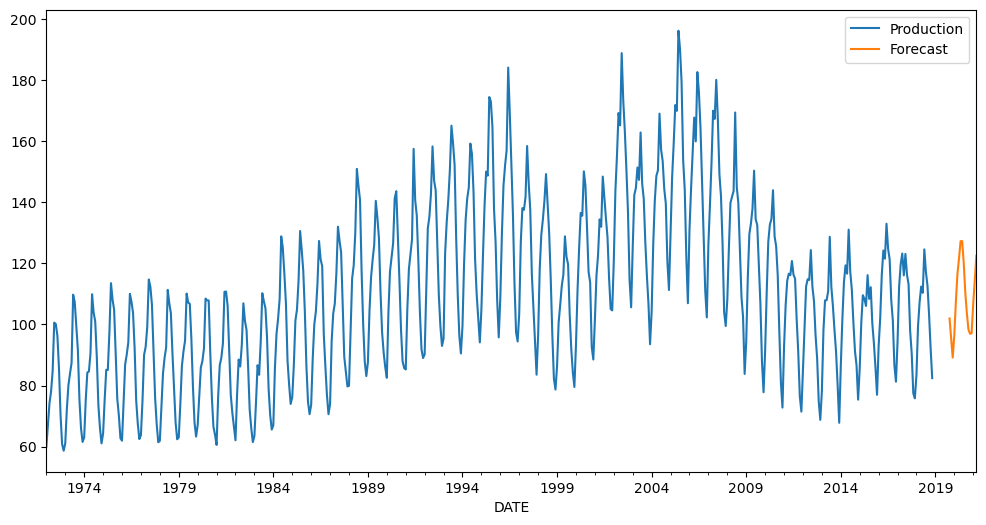

In [415]:
ax=df.iloc[:-10].plot(figsize=(12,6))
forecast_df.plot(ax=ax)